# **Requirement: What should do?**

- Based on learned knowledge to select data structure and design  algorithms for merge sort algorithms.
- Conditions: Using parallel algorithms

## Roles:
- Customer: Teacher and some students
- Author: Pair 8:
  - Hoàng Ngọc Quân
  - Cẩm Giang

# **Work Process Model:**
- Model Type: Waterfall (Step-driven)  
  - Spec Summary
  - Idea Tutorial
  - Design algorithms
  - Implement code
  - Validation  
  - Report documents

# **Activiti (0): Spec Summary**
- Outcome:
  - Problem Abstraction
  - Define Input and Output of problem
  - Define Conditions of problem

## Problem Abstraction
- Problem:
  - Give a array include ***n*** non-negative integer numbers ***a***.
  - Requirement: design a function that help sort ***a***

- Input:
  - array ***a***, python-type: list
- Output - Return:
  - array ***a*** after sort, python-type: list

- Conditions:
  - 1 <= n <= 2e5
  - using **parallel program (multiprocessor)** to optimize rate for code  


# **Activiti (1): Idea Tutorial**
- Outcome:
  - some comment about problem and task

## Tutorial
- A computer that have many processor to implement a program
- To implement a job, we may divide data to several independence parts
- Implement computation on each part a parallel way and combine outcome of them


## Step to Step
- Divide a into k lists
- Implement merge_sort on each list
- Then, merge k lists



# **Activiti (2): Design**
- Outcome:
  - Diagram

## Diagram

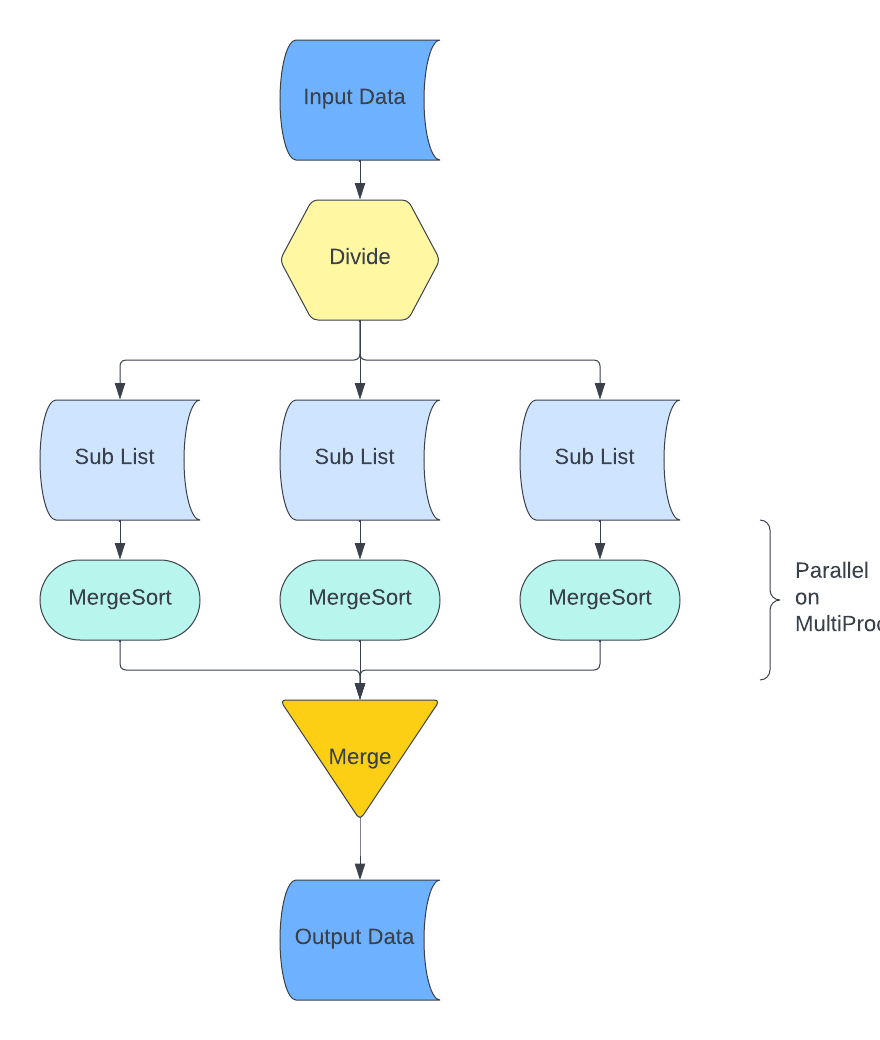

# **Activiti (3): Implement**

## Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool

## Constant

In [ ]:
NUMBER_PROCESSOR = os.cpu_count()
NUMBER_PROCESSOR

2

## Utils

In [ ]:
# api merge
def __init__():
  pass

def merge(listoflist: list) -> list:
  '''
  - This is a function that will merge k lists
  - inputs:
    - listoflist: list of k lists, type: list, shape: (k, +)
  - return:
    - a list of k lists after merge, type: list, shape (+)
  '''
  cursors = [[i, 0] for i in range(len(listoflist))]
  tmpData = []

  while len(cursors) > 0:
    valueMin = listoflist[cursors[0][ 0]][ cursors[0][ 1]]
    curHome = 0
    for i in range(len(cursors)):
      cur = cursors[i]
      if listoflist[cur[0]][ cur[1]] < valueMin:
        valueMin = listoflist[cur[0]][ cur[1]]
        curHome = i

    tmpData += [listoflist[cursors[curHome][ 0]][ cursors[curHome][ 1]]]
    cursors[curHome][ 1] += 1
    if cursors[curHome][ 1] >= len(listoflist[cursors[curHome][ 0]]):
      cursors.pop(curHome)

  return tmpData

def mergeSort(a: list) -> list:
  '''
  - This is a function that implement merge sort algorithms
  - inputs:
    - a: list that need sort, type: list, shape: (+)
  - return:
    - list after sort, type: list, shape: (+)
  '''
  if len(a) < 2:
    return a
  mid = len(a) // 2
  x = mergeSort(a[:mid])
  y = mergeSort(a[mid:])
  return merge(listoflist=[x, y])

In [ ]:
def generateInput(maxValue: int = 10**18, size: tuple = (2 * 10**5), draw = False) -> list:
  """
  - This is a function to generate input data that is a list include 'size' integer numbers and have max value is 'maxValue'
  - inputs:
    - maxValue: type: int, default = 10**18
    - size: type: tuple, default = 2 * 10**5
  - return:
    - a list
  - note:
    - draw distribution of input data
  """
  input = np.random.randint(maxValue, size=size).tolist()
  if(draw == True):
    sns.displot(data = input)
  return input

In [ ]:
def divideInput(input: list, numberParts: int = NUMBER_PROCESSOR, isPermutation: bool = True) -> list:
  """
  - This is a function to divide input into k parts
  - inputs:
    - input: type: list, shape: (+)
    - numberParts: type: int, default = number of processor
    - isPermutation: yes or no permutate input-list, default = True
  - return:
    - a list of k parts, type: list, shape: (k, +)
  """
  tmp = np.random.permutation(input).tolist()
  sublists = np.array_split(tmp, numberParts, axis = 0)
  sublists = [sub.tolist() for sub in sublists]
  return sublists

## Demo

In [ ]:
input = generateInput(20, 15)
input

[11, 2, 13, 1, 15, 13, 11, 13, 13, 19, 19, 18, 17, 15, 18]

In [ ]:
subinputs = divideInput(input)
subinputs

[[15, 13, 18, 13, 19, 1, 13, 11], [15, 11, 17, 2, 13, 19, 18]]

In [ ]:
pool = Pool(NUMBER_PROCESSOR)
suboutputs = pool.map(mergeSort, subinputs)
suboutputs

[[1, 11, 13, 13, 13, 15, 18, 19], [2, 11, 13, 15, 17, 18, 19]]

In [ ]:
pool.close()
pool.join()

In [ ]:
output = merge(suboutputs)
output

[1, 2, 11, 11, 13, 13, 13, 13, 15, 15, 17, 18, 18, 19, 19]

In [ ]:
output == sorted(input)

True

In [ ]:
output == mergeSort(input)

True

## **Parallel PackPage**

In [ ]:
def parallelMergeSort(input: list, numberParts: int = NUMBER_PROCESSOR, isPer = False) -> list:
  # divide input into parts
  subinputs = divideInput(input, numberParts = numberParts, isPermutation = isPer)
  # parallel running
  pool = Pool() # create pool of processors
  suboutputs = pool.map(mergeSort, subinputs)
  # close and join pool
  pool.close()
  pool.join()
  # merge
  output = merge(suboutputs)
  return output

# **Activiti (4): Validation**

controler for validation

In [ ]:
from traitlets.traitlets import ForwardDeclaredInstance
NUMBER_TESTCASE = 10
MAX = 10**5
SIZE = (10**5)

import time
NUMBER_FOLD = 5

NUMBER_PARTS = 10
IS_PER = False

In [ ]:
# compution time for fucntion
def computeTimeOfFunction(func, input, type, parts = NUMBER_PROCESSOR, isPer = False) -> float:
  runTime = time.perf_counter()
  if(type == False):
    func(input)
  else:
    func(input, parts, isPer)
  runTime = time.perf_counter() - runTime
  return round(runTime, 3)

In [ ]:
normal, parallel = [], []
np.random.seed(42)
for testcase in range(NUMBER_TESTCASE):
  # generate input data
  inputRoot = generateInput(MAX, SIZE)
  # inputRoot = list(range(10**5))

  for fold in range(NUMBER_FOLD):
    # normal version
    input = inputRoot.copy()
    runTime = time.perf_counter()
    out1 = mergeSort(input)
    runTime = time.perf_counter() - runTime
    normal += [round(runTime, 3)]

    # parallel version
    input = inputRoot.copy()
    runTime = time.perf_counter()
    out2 = parallelMergeSort(input, NUMBER_PARTS, IS_PER)
    runTime = time.perf_counter() - runTime
    parallel += [round(runTime, 3)]

    # check wrong
    if(out1 != out2):
      print("WRONG ANSER!!!")

In [ ]:
normal

[2.129,
 2.038,
 3.669,
 1.983,
 2.028,
 3.538,
 2.069,
 2.008,
 2.008,
 3.129,
 2.009,
 1.997,
 3.825,
 1.977,
 2.12,
 3.567,
 2.252,
 2.007,
 2.038,
 3.65,
 2.041,
 2.034,
 3.717,
 2.072,
 2.002,
 1.985,
 3.432,
 2.007,
 2.022,
 3.901,
 1.979,
 1.976,
 2.34,
 2.972,
 2.007,
 1.993,
 3.77,
 2.015,
 2.024,
 2.938,
 2.737,
 1.983,
 1.999,
 3.774,
 1.989,
 2.006,
 3.254,
 2.475,
 1.965,
 1.998]

In [ ]:
parallel

[1.951,
 3.077,
 2.803,
 1.945,
 1.94,
 3.359,
 1.93,
 1.924,
 5.043,
 1.983,
 1.933,
 2.452,
 2.7,
 1.94,
 2.752,
 3.215,
 1.954,
 1.945,
 3.347,
 2.092,
 1.996,
 1.983,
 3.331,
 1.946,
 1.951,
 3.651,
 1.954,
 1.991,
 2.148,
 2.916,
 1.917,
 1.942,
 3.625,
 1.952,
 1.994,
 2.587,
 2.542,
 1.935,
 1.948,
 3.263,
 2.008,
 1.987,
 2.788,
 2.39,
 1.941,
 1.958,
 3.324,
 1.939,
 2.018,
 3.215]

# **Activiti (5): Report**

In [ ]:
report = pd.DataFrame({'normal': normal, 'parallel': parallel})
report

,normal,parallel
0,2.129,1.951
1,2.038,3.077
2,3.669,2.803
3,1.983,1.945
4,2.028,1.940
5,3.538,3.359
6,2.069,1.930
7,2.008,1.924
8,2.008,5.043
9,3.129,1.983


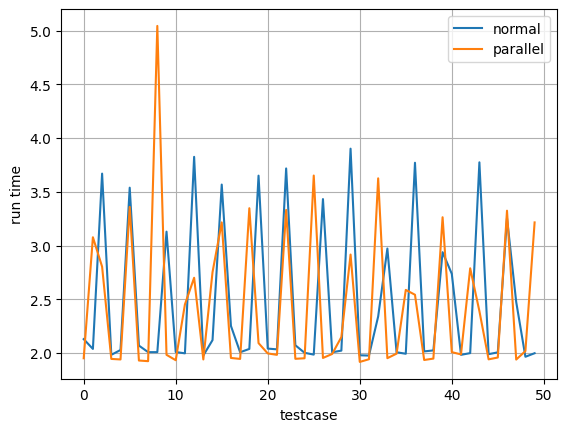

In [ ]:
plt.plot(report['normal'], label= 'normal')
plt.plot(report['parallel'], label= 'parallel')

plt.legend()
plt.xlabel('testcase')
plt.ylabel('run time')
plt.grid()

In [ ]:
print('mean time of normal is: ', f"{np.mean(normal):.3f}")
print('mean time of parallel is: ', f"{np.mean(parallel):.3f}")

mean time of normal is:  2.469
mean time of parallel is:  2.429


## **Conclude:**
- We can rely on the availability of multiple CPUs in a computer to design parallel algorithms.
- In Python, we can use the multiprocessing library and the Pool class.
- Generally, to perform a parallel algorithm, we need to divide the data into independent parts, perform calculations on each part simultaneously, and combine the results.
- In the above report, we see that the speed of the parallel algorithm is slightly faster than the serial algorithm.
- Depending on the hardware device, changing parameters such as NUMBER_PROCESSOR and the implementation method can yield impressive results on larger datasets with parallel algorithms.

In [ ]:
print('thank you')

thank you
